**Автор: Анна Смелова**

## Решение домашнего задания к уроку “Интеграл. Ряды”

In [1]:
import numpy as np
import sympy as sym
from matplotlib import pyplot as plt
import math
import warnings

warnings.filterwarnings('ignore')
sym.init_session()
%matplotlib inline

IPython console for SymPy 1.6.1 (Python 3.7.3-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



## Тема "Ряды"

### 1. Задание
#### Исследовать ряд на сходимость, используя признак д’Аламбера:

$$\sum_\limits{n=1}^{\infty}\frac{n^n}{(n!)^2}$$

**<font color='darkblue'>Теория:</font>**<br>
**Признак Даламбера**<br>
Пусть $\sum_\limits{n=1}^{\infty}a_n$ − ряд с положительными членами. Тогда справедливы следующие свойства:
* Если $\lim_\limits{n\to\infty}\frac{a_{n+1}}{a_n}<1$, то ряд $\sum_\limits{n=1}^{\infty}a_n$ сходится;
* Если $\lim_\limits{n\to\infty}\frac{a_{n+1}}{a_n}>1$, то ряд $\sum_\limits{n=1}^{\infty}a_n$ расходится;
* Если $\lim_\limits{n\to\infty}\frac{a_{n+1}}{a_n}=1$, то ряд $\sum_\limits{n=1}^{\infty}a_n$ может как сходиться, так и расходиться. В этом случае для установления сходимости нужно использовать другие признаки.

**<font color='darkblue'>Решение:</font>**<br>
$a_n=\frac{n^n}{(n!)^2}>0$<br><br>
$a_{n+1}=\frac{(n+1)^{n+1}}{((n+1)!)^2}=\frac{(n+1)^n(n+1)}{(n!)^2(n+1)^2}=\frac{(n+1)^n}{(n!)^2(n+1)}=\frac{(n+1)^{n-1}}{(n!)^2}$<br><br>
$\frac{a_{n+1}}{a_n}=\frac{(n+1)^{n-1}(n!)^2}{(n!)^2n^n}=\frac{(n+1)^{n-1}}{n^n}=\frac{(n+1)^n}{n^n(n+1)}=\frac{1}{n+1}(1+\frac{1}{n})^n$<br><br>
$\lim_\limits{n\to\infty}{|\frac{a_{n+1}}{a_n}|}=\lim_\limits{n\to\infty}{\frac{1}{n+1}(1+\frac{1}{n})^n}=0<1$<br>
$\Rightarrow sup(\lim_\limits{n\to\infty}{|\frac{a_{n+1}}{a_n}|})<1 \Rightarrow$ ряд $\sum_\limits{n=1}^{\infty}\frac{n^n}{(n!)^2}$ **сходится** по признаку д’Аламбера.

In [2]:
# численное решение:
sym.Sum((n**n / (sym.factorial(n))**2), (n, 1, oo)).evalf()

**<font color='darkblue'>Ответ: по признаку д’Аламбера ряд сходится.<br>Численно сходится к 3.54812822600731.</font>**

### 2. Задание
#### Исследовать ряд на сходимость, используя радикальный признак Коши:

$$\sum_\limits{n=1}^{\infty}\frac{n}{2^n}$$

**<font color='darkblue'>Теория:</font>**<br>
**Радикальный признак Коши**<br>
Пусть $\sum_\limits{n=1}^{\infty}a_n$ − ряд с положительными членами. Согласно признаку Коши:
* Если $\lim_\limits{n\to\infty}{\sqrt[n]{a_n}}<1$, то ряд $\sum_\limits{n=1}^{\infty}a_n$ сходится;
* Если $\lim_\limits{n\to\infty}{\sqrt[n]{a_n}}>1$, то ряд $\sum_\limits{n=1}^{\infty}a_n$ расходится;
* Если $\lim_\limits{n\to\infty}{\sqrt[n]{a_n}}=1$, то вопрос о сходимости ряда $\sum_\limits{n=1}^{\infty}a_n$ остается открытым.

**<font color='darkblue'>Решение:</font>**<br>
$a_n=\frac{n}{2^n}>0$<br><br>
$\lim_\limits{n\to\infty}{(\frac{n}{2^n})^{\frac{1}{n}}}=\lim_\limits{n\to\infty}{\frac{n^{\frac{1}{n}}}{2}}=\frac{1}{2}\lim_\limits{n\to\infty}{n^{\frac{1}{n}}}=\frac{1}{2}<1 \Rightarrow$ ряд **сходится** по признаку Коши.

In [3]:
# численное решение:
sym.Sum((n / 2**n), (n, 1, oo)).evalf()

**<font color='darkblue'>Ответ: по признаку Коши ряд сходится.<br>Численно сходится к 2.0.</font>**

### 3. Задание
#### Исследовать ряд на сходимость, используя признак Лейбница:

$$\sum_\limits{n=1}^{\infty}\frac{(-1)^n}{n+\ln{n}}$$

**<font color='darkblue'>Теория:</font>**<br>
**Признак Лейбница**<br>
Для знакочередующихся рядов действует достаточный признак сходимости Лейбница.<br>
Пусть $\{a_n\}$ является числовой последовательностью, такой, что:<br>
1. $a_{n+1}<a_n$ для всех $n$;
2. $\lim_\limits{n\to\infty}{a_n}=0$.

Тогда знакочередующиеся ряды $\sum_\limits{n=1}^{\infty}{(-1)^na_n}$ и $\sum_\limits{n=1}^{\infty}{(-1)^{n-1}a_n}$ сходятся.<br>
**Абсолютная и условная сходимость**<br>
Ряд $\sum_\limits{n=1}^{\infty}{a_n}$ называется абсолютно сходящимся, если ряд $\sum_\limits{n=1}^{\infty}{|a_n|}$ также сходится.<br>
Ряд $\sum_\limits{n=1}^{\infty}{a_n}$ называется условно сходящимся, если сам он сходится, а ряд, составленный из модулей его членов, расходится.

**<font color='darkblue'>Решение:</font>**<br>
$S=\sum_\limits{n=1}^{\infty}\frac{(-1)^{n}}{n+\ln{n}}=-\frac{1}{1+\ln{1}}+\frac{1}{2+\ln{2}}-\frac{1}{3+\ln{3}}+\frac{1}{4+\ln{4}}-\frac{1}{5+\ln{5}}+... \Rightarrow$ ряд является знакочередующимся<br><br>
$a_n=\frac{1}{n+\ln{n}}>0 \forall n\in[1,\infty)$<br><br>
1. $\frac{a_{n}}{a_{n+1}}=\frac{n+1\ln{(n+1)}}{n+\ln{(n)}}=\frac{n+\ln{(n)}+1+\ln{\frac{n+1}{n}}}{n+\ln{(n)}}=1+\frac{1+\ln{(1+\frac{1}{n})}}{n+\ln{(n)}}$<br>
Т.к. $(1+\frac{1}{n})>1$, то $\ln{(1+\frac{1}{n})}>0 \forall n\in[1,\infty)$<br>
Т.к. $n\geq1$, то $n+\ln{(n)}>0 \forall n\in[1,\infty)$<br>
$\Rightarrow \frac{1+\ln{(1+\frac{1}{n})}}{n+\ln{(n)}}>0 \Rightarrow 1+\frac{1+\ln{(1+\frac{1}{n})}}{n+\ln{(n)}}>1$<br>
$\frac{a_{n}}{a_{n+1}}>1 \Rightarrow a_{n+1}<a_n \forall n\in[1,\infty)$.
2. $\lim_\limits{n\to\infty}{a_n}=\lim_\limits{n\to\infty}{\frac{1}{n+\ln{n}}}=0$

Следовательно, по признаку сходимости Лейбница, ряд $\sum_\limits{n=1}^{\infty}\frac{(-1)^{n}}{n+\ln{n}}$ сходится.<br><br>
Определим характер сходимости: воспользуемся 2 признаком сравнения, в качестве "эталонного" ряда возьмем гармонический ряд $\lim\limits_{n\to\infty}\frac{\frac{1}{n}}{\frac{1}{n+\ln{n}}}=\lim\limits_{n\to\infty}\frac{n+\ln{n}}{n}=\lim\limits_{n\to\infty}(1+\frac{\ln{n}}{n})=1\neq0$ $\Rightarrow$ сходимость у рядов одинаковая.<br>
Ряд $\sum_\limits{n=1}^{\infty}\frac{1}{n}$ - расходится $\Rightarrow \sum_\limits{n=1}^{\infty}\frac{1}{n+\ln{n}}$ тоже расходится.<br><br>

Значит ряд $\sum_\limits{n=1}^{\infty}\frac{(-1)^{n}}{n+\ln{n}}$ является **условно сходящимся**.

**<font color='darkblue'>Ответ: по признаку Лейбница ряд сходится условно.</font>**

### 4. Задание
#### Исследовать ряд на сходимость, используя признак Раабе:

$$\sum_\limits{n=1}^{\infty}\frac{3^n}{2^n}$$

**<font color='darkblue'>Теория:</font>**<br>
Пусть $\sum_\limits{n=1}^{\infty}a_n$ − ряд с положительными членами. Согласно признаку Раабе:
$R_n=n(\frac{a_n}{a_{n+1}}-1)$<br>
Если существует предел: $R=\lim_\limits{n\to\infty}{R_n}$, то при $R>1$ ряд сходится, а при $R<1$ — расходится. Если $R=1$, то признак Раабе не даёт ответа на вопрос о сходимости ряда.

**<font color='darkblue'>Решение:</font>**<br>
$a_n=\frac{3^n}{2^n}$<br>
Вообще здесь $\lim\limits_{n\to\infty}a_n=\lim\limits_{n\to\infty}\frac{3^n}{2^n}=\infty\neq0$, т.е. не выполняется необходимое условие сходимости,но проверим еще по признаку Раабе.<br>
$a_n>0 \forall n\in[1,\infty)$<br>
$R_n=n(\frac{a_n}{a_{n+1}}-1)=n(\frac{3^n2^{n+1}}{2^n3^{n+1}}-1)=n(\frac{2}{3}-1)=n(-\frac{1}{3})=-\frac{n}{3}$<br>
$\lim_\limits{n\to\infty}{R_n}=\lim_\limits{n\to\infty}{(-\frac{n}{3})}=-\infty\leq 1 \Rightarrow$ ряд **расходится** по признаку Раабе.<br>

**<font color='darkblue'>Ответ: по признаку Раабе ряд расходится.</font>**

### 5. Задание
#### Разложить функцию по Тейлору в единице:

$$f(x)=\ln{(16x^2)}$$

**<font color='darkblue'>Теория:</font>**<br>
Ряд Тейлора: $\sum_\limits{n=0}^{\infty}{\frac{f^{(n)}(a)}{n!}}(x-a)^n=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+...$

**<font color='darkblue'>Решение:</font>**<br>
$f(x)=\ln{(16x^2)}, f(1)=\ln{(16)}$<br>
$f'(x)=\frac{2}{x}, f'(1)=2$<br>
$f^{(2)}(x)=-\frac{2}{x^2}, f^{(2)}(1)=-2$<br>
$f^{(3)}(x)=\frac{4}{x^3}, f^{(3)}(1)=4$<br>
$f^{(4)}(x)=-\frac{12}{x^4}, f^{(4)}(1)=-12$<br><br>
$f(x)=\ln{(16x^2)}=\ln{(16)}+2(x-1)-\frac{2(x-1)^2}{2!}+\frac{4(x-1)^3}{3!}-\frac{12(x-1)^4}{4!}+...=\ln{(2^4)}+2(x-1)-(x-1)^2+\frac{2(x-1)^3}{3}-\frac{(x-1)^4}{2}+\frac{2(x-1)^5}{5}-\frac{(x-1)^6}{3}...=4\ln{(2)}+\frac{2(x-1)^1}{1}-\frac{2(x-1)^2}{2}+\frac{2(x-1)^3}{3}-\frac{2(x-1)^4}{4}+...=4\ln{(2)}+\sum_\limits{n=1}^{\infty}\frac{(-1)^{n+1}2(x-1)^n}{n}$

**<font color='darkblue'>Ответ: $\ln{(16x^2)}=4\ln{(2)}+\sum_\limits{n=1}^{\infty}\frac{(-1)^{n+1}2(x-1)^n}{n}$</font>**

### $6^*$. Задание
#### Дана функция $f(x)=x^2$
#### a. Разложить функцию в ряд Фурье по косинусам на отрезке $x\in[-2;0]$
#### b. Построить график функции и ее разложения.

**<font color='darkblue'>Теория:</font>**<br>
Ряд Фурье функции $f(x)$ представляется в виде: $f(x)=\frac{a_0}{2}+\sum_\limits{n=1}^{\infty}\{a_n\cos{(nx)}+b_n\sin{(nx)}\}$<br>
где коэффициенты Фурье $a_0$, $a_n$ и $b_n$ определяются формулами:<br>
$a_0=\frac{1}{\pi}\int_\limits{-\pi}^{\pi}f(x)dx$, $a_n=\frac{1}{\pi}\int_\limits{-\pi}^{\pi}f(x)\cos{(nx)}dx$, $b_n=\frac{1}{\pi}\int_\limits{-\pi}^{\pi}f(x)\sin{(nx)}dx$<br>
**Разложение в ряд Фурье непериодических функций в интервале $[a;b]$**:<br>
Если функция $f(x)$ определена в интервале $[a,b]$, то ее разложение в ряд Фурье определяется формулой:<br>
$f(x)=\frac{a_0}{2}+\sum_\limits{n=1}^{\infty}\{a_n\cos{\frac{(n\pi x)}{L}}+b_n\sin{\frac{(n\pi x)}{L}}\}$, где $L=\frac{b-a}{2}$, а коэффициенты вычисляются следующим образом:<br>
$a_0=\frac{1}{L}\int_\limits{a}^{b}f(x)dx$, $a_n=\frac{1}{L}\int_\limits{a}^{b}f(x)\cos{\frac{n\pi x}{L}}dx$, $b_n=\frac{1}{L}\int_\limits{a}^{b}f(x)\sin{\frac{n\pi x}{L}}dx$, $n=1,2,3,...$<br>


**<font color='darkblue'>Решение:</font>**<br>
$[a;b]=[-2;0]$, $L=\frac{b-a}{2}=\frac{2}{2}=1$<br><br>
$a_0=\int\limits_{-2}^0x^2dx=\frac{x^3}{3}|_{-2}^0=0-\frac{-8}{3}=\frac{8}{3}$<br><br>

$a_n=\int\limits_{-2}^0x^2\cos{(\pi nx)}dx=\frac{1}{\pi n}\int\limits_{-2}^0x^2d\sin{(\pi nx)}=\frac{x^2\sin{(\pi nx)}}{\pi n}|_{-2}^0-\frac{1}{\pi n}\int\limits_{-2}^0\sin{(\pi nx)}2xdx=\frac{2}{\pi^2n^2}\int\limits_{-2}^0xd\cos{(\pi nx)}=\frac{2x\cos{(\pi nx)}}{\pi^2n^2}|_{-2}^0-\frac{2}{\pi^2n^2}\int\limits_{-2}^0\cos{(\pi nx)}dx=0-\frac{-4\cos{(-2\pi n)}}{\pi^2n^2}-\frac{2}{\pi^3n^3}\sin{(\pi nx)}|_{-2}^0=\frac{4}{\pi^2n^2}$<br><br>

$b_n=\int\limits_{-2}^0x^2\sin{(\pi nx)}=\frac{-1}{\pi n}\int\limits_{-2}^0x^2d\cos{(\pi nx)}=\frac{-x^2\cos{(\pi nx)}}{\pi n}|_{-2}^0+\frac{1}{\pi n}\int\limits_{-2}^0\cos{(\pi nx)}2xdx=0-\frac{-4\cos{(-2\pi n)}}{\pi n}+\frac{2}{\pi^2n^2}\int\limits_{-2}^0xd\sin{(\pi nx)}=\frac{4}{\pi n}+\frac{2x\sin{(\pi nx)}}{\pi^2n^2}|_{-2}^0-\frac{2}{\pi^2n^2}\int\limits_{-2}^0\sin{(\pi nx)}dx=\frac{4}{\pi n}-\frac{2}{\pi^3n^3}\cos{(\pi nx)}|_{-2}^0=\frac{4}{\pi n}$<br><br>

$\Rightarrow f(x)=x^2=\frac{4}{3}+\sum\limits_{n=1}^{\infty}\{\frac{4}{\pi^2n^2}\cos{(\pi nx)}+\frac{4}{\pi n}\sin{(\pi nx)}\}$

In [4]:
def get_sum(x, n):
    result = []
    for el in x:
        res = 4/3
        i = 1
        while i<=n:
            res += (4*math.cos(math.pi*i*el))/(math.pi*i)**2 + (4*math.sin(math.pi*i*el))/(math.pi*i)
            i += 1
        result.append(res)
    return np.array(result)

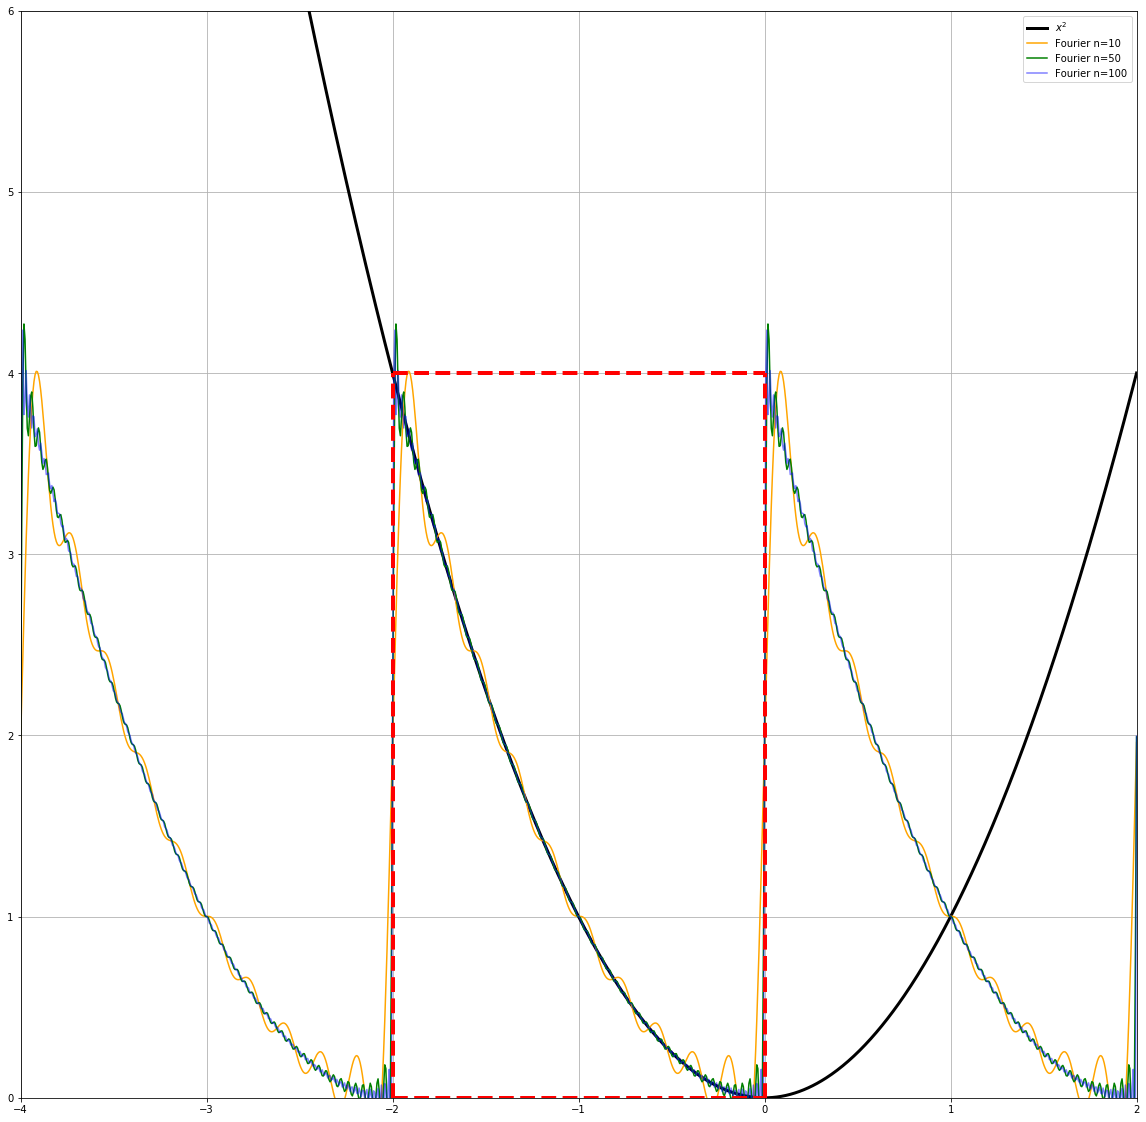

In [5]:
x = np.linspace(-4, 2, 1000)
y1 = x**2
y2 = get_sum(x, 10)
y3 = get_sum(x, 50)
y4 = get_sum(x, 100)
plt.figure(figsize=(20,20))
plt.plot(x, y1, label='$x^2$', c='black',linewidth=3)
plt.plot(x, y2, label='Fourier n=10', c='orange')
plt.plot(x, y3, label='Fourier n=50', c='g')
plt.plot(x, y4, label='Fourier n=100', c='b', alpha=0.5)
plt.plot([-2, 0], [0, 0], color='r', linestyle='--', linewidth=4, alpha=1)
plt.plot([0, 0], [0, 4], color='r', linestyle='--', linewidth=4, alpha=1)
plt.plot([-2, 0], [4, 4], color='r', linestyle='--', linewidth=4, alpha=1)
plt.plot([-2, -2], [0, 4], color='r', linestyle='--', linewidth=4, alpha=1)
plt.axis([-4, 2, 0, 6])
plt.legend()
plt.grid()
plt.show()

**<font color='darkblue'>Ответ: $x^2=\frac{4}{3}+\sum\limits_{n=1}^{\infty}\{\frac{4}{\pi^2n^2}\cos{(\pi nx)}+\frac{4}{\pi n}\sin{(\pi nx)}\}$</font>**

## Тема "Понятие об интеграле"

### 1. Задание
#### Найти неопределенный интеграл:

$$\int{(2x^2-2x-1+\sin{x}-\cos{x}+\ln{x}+e^x)dx}$$

**<font color='darkblue'>Решение:</font>**<br>
$\int(2x^2-2x-1+\sin{x}-\cos{x}+\ln{x}+e^x)dx=\int(2x^2)dx-\int(2x)dx-\int dx+\int\sin{x}dx-\int\cos{x}dx+\int\ln{x}dx+\int e^xdx=2\frac{x^3}{3}-2\frac{x^2}{2}-x-\cos{x}-\sin{x}+x\ln{x}-x+e^x+Const=\frac{2x^3}{3}-x^2-2x-\cos{x}-\sin{x}+x\ln{x}+e^x+Const$

**<font color='darkblue'>Ответ: $\frac{2x^3}{3}-x^2-2x-\cos{x}-\sin{x}+x\ln{x}+e^x+Const$</font>**

### 2. Задание
#### Найти неопределенный интеграл:

$$\int{(2x+6xz^2-5x^2y-3\ln{z})dx}$$

**<font color='darkblue'>Решение:</font>**<br>
$\int{(2x+6xz^2-5x^2y-3\ln{z})dx}=\int(2x)dx+\int(6xz^2)dx-\int(5x^2y)dx-\int(3\ln{z})dx=2\frac{x^2}{2}+6z^2\frac{x^2}{2}-5y\frac{x^3}{3}-3\ln{z}x+C=x^2+3x^2z^2-\frac{5x^3y}{3}-3x\ln{z}+C$

**<font color='darkblue'>Ответ: $x^2+3x^2z^2-\frac{5x^3y}{3}-3x\ln{z}+C$</font>**

### 3. Задание
#### Вычислить определенный интеграл:

$$\int\limits_0^{\pi}{3x^2\sin{(2x)}dx}$$

**<font color='darkblue'>Решение:</font>**<br>
$\int\limits_0^{\pi}{3x^2\sin{(2x)}dx}=\int\limits_0^{\pi}-3x^2\frac{1}{2}d\cos{(2x)}=\frac{-3x^2}{2}\cos{(2x)}|_0^{\pi}+\int\limits_0^{\pi}\frac{3}{2}\cos{(2x)}dx^2=\frac{-3\pi^2}{2}\cos{(2\pi)}+0+\int\limits_0^{\pi}\frac{3}{2}\cos{(2x)}2dx=-\frac{3\pi^2}{2}+\frac{3}{2}\sin{(2x)}|_0^{\pi}=-\frac{3\pi^2}{2}$

**<font color='darkblue'>Ответ: $-\frac{3\pi^2}{2}$</font>**

### 4. Задание
#### Найти неопределенный интеграл:

$$\int{\frac{1}{\sqrt{x+1}}dx}$$

**<font color='darkblue'>Решение:</font>**<br>
Пусть $y=\sqrt{x+1}$, тогда $dy=d(x+1)^{\frac{1}{2}}=\frac{1}{2}(x+1)^{-\frac{1}{2}}dx=\frac{dx}{2\sqrt{x+1}}$<br>
$\Rightarrow \int{\frac{1}{\sqrt{x+1}}dx}=\int2dy=2y+Const=2\sqrt{x+1}+Const$

**<font color='darkblue'>Ответ: $2\sqrt{x+1}+Const$</font>**